# Welcome to deepracer analysis

## Select your map and upload your csv file

In [1]:
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

output_track = widgets.Output()
output_trajectory = widgets.Output()
output_container = widgets.HBox([output_track, output_trajectory])

def list_npy_files(directory):
    return [f for f in os.listdir(directory) if f.endswith('.npy')]

npy_directory = 'maps'  # Replace with your directory path
npy_files = list_npy_files(npy_directory)

npy_selector = widgets.Dropdown(
    options=npy_files,
    description='Select .npy:',
    style={'description_width': 'initial'}
)

def plot_track(track_data):
    with output_track:
        output_track.clear_output(wait=True)
        inner_waypoints = track_data[:, 0:2]
        outer_waypoints = track_data[:, 2:4]
        plt.plot(inner_waypoints[:, 0], inner_waypoints[:, 1], 'r', label='Inner Waypoints')
        plt.plot(outer_waypoints[:, 0], outer_waypoints[:, 1], 'b', label='Outer Waypoints')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('DeepRacer Track')
        plt.legend()
        plt.show()

def on_npy_selected(change):
    selected_file = change['new']
    track_data = np.load(os.path.join(npy_directory, selected_file))
    plot_track(track_data)

npy_selector.observe(on_npy_selected, names='value')

def plot_car_trajectory(df):
    with output_trajectory:
        output_trajectory.clear_output(wait=True)
        plt.scatter(df['X'], df['Y'], c=df.index, cmap='viridis', s=1)
        plt.colorbar(label='Time step')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Car Trajectory')
        plt.show()

def on_csv_uploaded(change):
    csv_data = change['new'][0]['content']
    car_data = pd.read_csv(io.BytesIO(csv_data))
    plot_car_trajectory(car_data)

csv_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=False,
    description='Upload .csv',
    style={'description_width': 'initial'}
)
csv_uploader.observe(on_csv_uploaded, names='value')

display(npy_selector)
display(csv_uploader)
display(output_container)

Dropdown(description='Select .npy:', options=('2022_april_open.npy', '2022_april_pro.npy', '2022_august_open.n…

FileUpload(value=(), accept='.csv', description='Upload .csv')

## Upload your training logs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from deepracer.tracks import TrackIO, Track
from deepracer.logs import \
    SimulationLogsIO as slio, \
    PlottingUtils as pu,\
    AnalysisUtils as au   #, \

import warnings
warnings.filterwarnings('ignore')
tu = TrackIO()

fname = 'training-20230427044742-kZgzE4keSa6VxUJnuVlsAQ-robomaker.log'

Set to value of your hyperparameter in training

In [3]:
episodes_slider = widgets.IntSlider(
    value=EPISODES_PER_ITERATION,
    min=1,
    max=100,
    step=1,
    description='Episodes:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def on_change(change):
    global EPISODES_PER_ITERATION
    EPISODES_PER_ITERATION = change['new']
    data = slio.load_data(fname)
    df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

    df = df.sort_values(['episode', 'steps'])

    simulation_agg = au.simulation_agg(df)
    au.analyze_training_progress(simulation_agg, title='Training progress')

episodes_slider.observe(on_change, names='value')
display(episodes_slider)

EPISODES_PER_ITERATION = 20 #  Set to value of your hyperparameter in training

data = slio.load_data(fname)
df = slio.convert_to_pandas(data, episodes_per_iteration=EPISODES_PER_ITERATION)

df = df.sort_values(['episode', 'steps'])
simulation_agg = au.simulation_agg(df)
au.analyze_training_progress(simulation_agg, title='Training progress')

NameError: name 'EPISODES_PER_ITERATION' is not defined

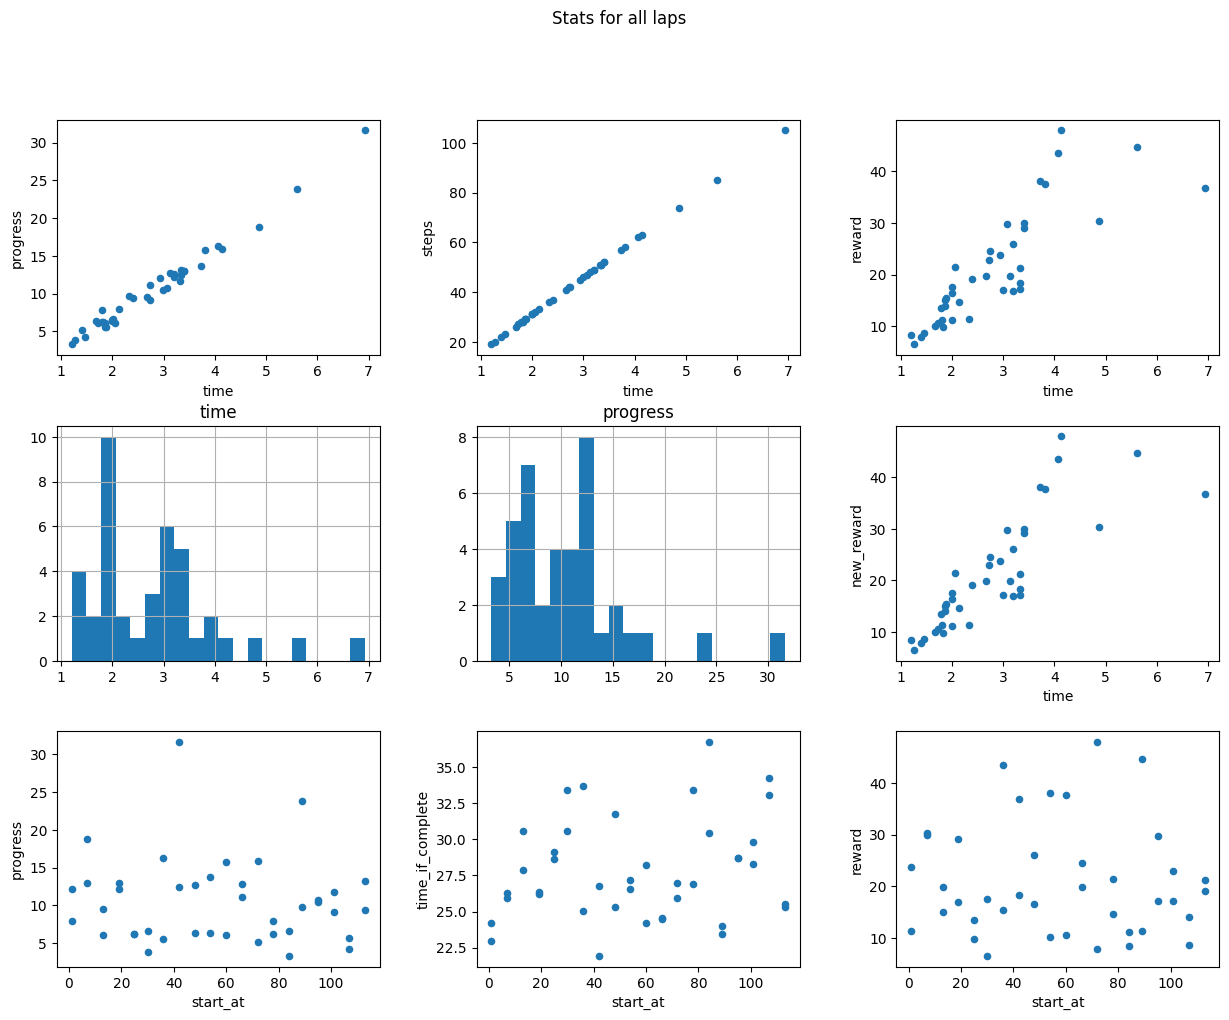

<Figure size 640x480 with 0 Axes>

In [64]:
au.scatter_aggregates(simulation_agg, 'Stats for all laps')

In [65]:
complete_ones = simulation_agg[simulation_agg['progress']==100]

if complete_ones.shape[0] > 0:
    au.scatter_aggregates(complete_ones, 'Stats for complete laps')
else:
    print('No complete laps yet.')

No complete laps yet.


In [66]:
# View five most progressed episodes
simulation_agg.nlargest(5, 'progress')

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete
7,1,7,105,42,31.6207,6.932,5.451069,36.818,0.758667,36.818,21.922348,116.436385,1st,0
35,2,35,85,89,23.8704,5.603,4.291737,44.711,0.744471,44.711,23.472585,187.307293,5th,0
1,1,1,74,7,18.7645,4.866,3.745216,30.405,0.742838,30.405,25.931946,162.034693,1st,0
26,2,26,62,36,16.2508,4.065,3.237462,43.506,0.760968,43.506,25.014153,267.716051,4th,0
32,2,32,63,72,15.9380,4.135,3.062504,47.906,0.744921,47.906,25.944284,300.577237,5th,0


In [67]:
# View five best rewarded in completed laps
complete_ones.nlargest(5, 'reward')

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete


In [68]:
# View information for a couple last episodes
simulation_agg.tail()

,iteration,episode,steps,start_at,progress,time,dist,new_reward,speed,reward,time_if_complete,reward_if_complete,quintile,complete
35,2,35,85,89,23.8704,5.603,4.291737,44.711,0.744471,44.711,23.472585,187.307293,5th,0
36,2,36,47,95,10.6899,3.068,2.255833,29.708,0.743404,29.708,28.699988,277.907183,5th,0
37,2,37,42,101,9.1450,2.728,1.849191,22.907,0.668333,22.907,29.830508,250.486605,5th,0
38,2,38,23,107,4.2787,1.465,0.965145,8.606,0.766957,8.606,34.239372,201.135859,5th,0
39,2,39,37,113,9.4168,2.402,1.714036,19.107,0.730000,19.107,25.507603,202.903322,5th,0
